# Installation des librairies

In [6]:
!pip install -q -q -q tifffile
!pip install -q -q -q tqdm
import os
#quelque-chose
os.chdir('/tf/work/challenge-donnees-sat')

# Lecture des librairies et framework

In [8]:
%load_ext autoreload
%autoreload 2

import s3fs
import shutil

from pathlib import Path
import random

import numpy as np
from tifffile import TiffFile
import matplotlib.pyplot as plt
import colorsys
import PIL
from PIL import Image
from tqdm import tqdm
import matplotlib.patches as mpatches
import time

from framework.dataset import LandCoverData as LCD

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Téléchargement + lecture des images de la BDD

In [3]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})
fs.get('projet-challengedata-ens/data/additional_files_earthcube_emu4zqr.zip', 'additional_files_earthcube_emu4zqr.zip')
shutil.unpack_archive('additional_files_earthcube_emu4zqr.zip')

# Trainning et Test

In [4]:
DATA_FOLDER_STR = 'dataset'
DATA_FOLDER = Path(DATA_FOLDER_STR).expanduser()
# path to the unzipped dataset: contains directories train/ and test/
DATASET_FOLDER = DATA_FOLDER

# get all train images and masks
train_images_paths = sorted(list(DATASET_FOLDER.glob('train/images/*.tif')))
train_masks_paths = sorted(list(DATASET_FOLDER.glob('train/masks/*.tif')))
# get all test images
test_images_paths = sorted(list(DATASET_FOLDER.glob('test/images/*.tif')))

## Visualize data points

In [5]:
def test(image, mask):
    """Calcule des pixels
    Args : 
        image (numpy.array[uint8])
        mask (numpy.array[uint8]): the mask in 8-bit
        
    """
    colors_mask = np.asarray(LCD.CLASSES_COLORPALETTE.items())
    
    colimg= np.array(image)
    colmask = np.array(mask)
    colmask_test = np.array(mask)
    count = 0
    
    
    a = 4
    no_data = np.empty((0,a))
    clouds = np.empty((0,a))
    artificial = np.empty((0,a))
    cultivated = np.empty((0,a))
    broadleaf = np.empty((0,a))
    coniferous = np.empty((0,a))
    herbaceous = np.empty((0,a))
    natural = np.empty((0,a))
    snow = np.empty((0,a))
    water = np.empty((0,a))
    axisconca = 0
    
    for i in range (colmask.shape[0]):
        for j in range (colmask.shape[1]):            
            if colmask_test[i][j] == 0 :
                no_data = np.concatenate((no_data,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [0,0,0]
            if colmask_test[i][j] == 1 :
                clouds  = np.concatenate((clouds,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [255,25,236]
            if colmask_test[i][j] == 2 :
                artificial  = np.concatenate((artificial,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [215,25,28]
            if colmask_test[i][j] == 3 :
                cultivated  = np.concatenate((cultivated,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [211,154,92]
            if colmask_test[i][j] == 4 :
                test = colimg[i][j]
                broadleaf  = np.concatenate((broadleaf,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [33,115,55]
            if colmask_test[i][j] == 5 :
                coniferous  = np.concatenate((coniferous,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [21,75,35]
            if colmask_test[i][j] == 6 :
                herbaceous  = np.concatenate((herbaceous,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [118,209,93]
            if colmask_test[i][j] == 7 :
                natural  = np.concatenate((natural,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [130,130,130]
            if colmask_test[i][j] == 8 :
                snow  = np.concatenate((snow,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [255,255,255]
            if colmask_test[i][j] == 9 :
                water  = np.concatenate((water,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [43,61,255]
                
        count = count +1
    return colmask_test, no_data, clouds, artificial, cultivated, broadleaf, coniferous, herbaceous, natural, snow, water


#def moy_pix(no_data, clouds, artificial, cultivated, broadleaf, coniferous, herbaceous, natural, snow, water):


def test2(colimage):

    
    image= np.array(colimage)
    
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):            
            if ((no_data_inf[0]<image[i][j][0]<no_data_inf[0])and(no_data_inf[1]<image[i][j][1]<no_data_inf[1])and(no_data_inf[2]<image[i][j][2]<no_data_inf[2])and(no_data_inf[3]<image[i][j][3]<no_data_inf[3])) :
                test_no_data +=1
            if ((clouds_inf[0]<image[i][j][0]<clouds_inf[0])and(clouds_inf[1]<image[i][j][1]<clouds_inf[1])and(clouds_inf[2]<image[i][j][2]<clouds_inf[2])and(clouds_inf[3]<image[i][j][3]<clouds_inf[3])) :
                test_clouds +=1
                #colmask_test[i][j] == [255,25,236]
            if ((artificial_inf[0]<image[i][j][0]<artificial_inf[0])and(artificial_inf[1]<image[i][j][1]<artificial_inf[1])and(artificial_inf[2]<image[i][j][2]<artificial_inf[2])and(artificial_inf[3]<image[i][j][3]<artificial_inf[3])) :
                test_artificial +=1
                #colmask_test[i][j] == [215,25,28]
            if ((cultivated_inf[0]<image[i][j][0]<cultivated_inf[0])and(cultivated_inf[1]<image[i][j][1]<cultivated_inf[1])and(cultivated_inf[2]<image[i][j][2]<cultivated_inf[2])and(cultivated_inf[3]<image[i][j][3]<cultivated_inf[3])) :
                test_cultivated  += 1
                #colmask_test[i][j] == [211,154,92]
            if ((broadleaf_inf[0]<image[i][j][0]<broadleaf_inf[0])and(broadleaf_inf[1]<image[i][j][1]<broadleaf_inf[1])and(broadleaf_inf[2]<image[i][j][2]<broadleaf_inf[2])and(broadleaf_inf[3]<image[i][j][3]<broadleaf_inf[3])) :
                
                test_broadleaf  += 1
                #colmask_test[i][j] == [33,115,55]
            if ((coniferous_inf[0]<image[i][j][0]<coniferous_inf[0])and(coniferous_inf[1]<image[i][j][1]<coniferous_inf[1])and(coniferous_inf[2]<image[i][j][2]<coniferous_inf[2])and(coniferous_inf[3]<image[i][j][3]<coniferous_inf[3])) :
                test_coniferous  += 1
                #colmask_test[i][j] == [21,75,35]
            if ((herbaceous_inf[0]<image[i][j][0]<herbaceous_inf[0])and(herbaceous_inf[1]<image[i][j][1]<herbaceous_inf[1])and(herbaceous_inf[2]<image[i][j][2]<herbaceous_inf[2])and(herbaceous[3]<image[i][j][3]<herbaceous_inf[3])) :
                test_herbaceous  += 1
                #colmask_test[i][j] == [118,209,93]
            if ((natural_inf[0]<image[i][j][0]<natural_inf[0])and(natural_inf[1]<image[i][j][1]<natural_inf[1])and(natural_inf[2]<image[i][j][2]<natural_inf[2])and(natural_inf[3]<image[i][j][3]<natural_inf[3])) :
                test_natural  += 1
                #colmask_test[i][j] == [130,130,130]
            if ((snow_inf[0]<image[i][j][0]<snow_inf[0])and(snow_inf[1]<image[i][j][1]<snow_inf[1])and(snow_inf[2]<image[i][j][2]<snow_inf[2])and(snow_inf[3]<image[i][j][3]<snow_inf[3])) :
                test_snow  += 1
                #colmask_test[i][j] == [255,255,255]
            if ((no_data_inf[0]<image[i][j][0]<no_data_inf[0])and(no_data_inf[1]<image[i][j][1]<no_data_inf[1])and(no_data_inf[2]<image[i][j][2]<no_data_inf[2])and(no_data_inf[3]<image[i][j][3]<no_data_inf[3])) :
                test_water  += 1
                #colmask_test[i][j] == [43,61,255]
    
    return test_no_data, test_clouds, test_artificial, test_cultivated,  test_broadleaf, test_coniferous, test_herbaceous, test_natural, test_snow, test_water

def intervalle(no_data, clouds, artificial, cultivated,  broadleaf, coniferous, herbaceous, natural, snow, water, no_data_in, clouds_in, artificial_in, cultivated_in,  broadleaf_in, coniferous_in, herbaceous_in, natural_in, snow_in, water_in):
    no_data_inf = no_data-no_data_in
    no_data_sup = no_data+no_data_in
    clouds_inf = clouds-clouds_in
    clouds_sup = clouds+clouds_in
    artificial_inf = artificial-artificial_in
    artificial_sup = artificial+artificial_in
    cultivated_inf = cultivated-cultivated_in
    cultivated_sup = cultivated+cultivated_in
    broadleaf_inf = broadleaf-broadleaf_in
    broadleaf_sup = broadleaf+broadleaf_in
    coniferous_inf = coniferous-coniferous_in
    coniferous_sup = coniferous+coniferous_in
    herbaceous_inf = herbaceous-herbaceous_in
    herbaceous_sup = herbaceous+herbaceous_in
    natural_inf = natural-natural_in
    natural_sup = natural+natural_in
    snow_inf = snow-snow_in
    snow_sup = snow+snow_in
    water_inf = water-water_in
    water_sup = water+water_in
    
    return(no_data_inf, no_data_sup, clouds_inf, clouds_sup, artificial_inf, artificial_sup, cultivated_inf, cultivated_sup,
           broadleaf_inf, broadleaf_sup, coniferous_inf, coniferous_sup, herbaceous_inf, herbaceous_sup,
           natural_inf, natural_sup, snow_inf, snow_sup, water_inf, water_sup)

In [9]:
display_max = 2200
display_min = 0
a = 4
no_data = np.empty((0,a))
clouds = np.empty((0,a))
artificial = np.empty((0,a))
cultivated = np.empty((0,a))
broadleaf = np.empty((0,a))
coniferous = np.empty((0,a))
herbaceous = np.empty((0,a))
natural = np.empty((0,a))
snow = np.empty((0,a))
water = np.empty((0,a))
axisconca = 0
no_data_moy_tot = np.empty((0,a))
clouds_moy_tot = np.empty((0,a))
artificial_moy_tot = np.empty((0,a))
cultivated_moy_tot = np.empty((0,a))
broadleaf_moy_tot = np.empty((0,a))
coniferous_moy_tot = np.empty((0,a))
herbaceous_moy_tot = np.empty((0,a))
natural_moy_tot = np.empty((0,a))
snow_moy_tot = np.empty((0,a))
water_moy_tot = np.empty((0,a))

for k, idx in enumerate(random.sample(range(len(train_images_paths)), 10)):
    axisconca = 0
    image_path = train_images_paths[idx]
    mask_path = train_masks_paths[idx]
    assert image_path.name == mask_path.name
    
    #fig, axs = plt.subplots(1, 3, figsize=(20, 20))
    
    with TiffFile(image_path) as tif:
        image = tif.asarray()  
    if image.dtype == np.uint16:
        iscale = display_max - display_min
        scale = 255 / iscale
        byte_im = (image) * scale
        byte_im = (byte_im.clip(0, 255) + 0.5).astype(np.uint8)
    colimg = byte_im
    #axs[0].axis("off")
    #im = axs[0].imshow(image)

    with TiffFile(mask_path) as tif :
        colmask = tif.asarray()
        colmask_test = colmask
    
    for i in range (colmask.shape[0]):
        for j in range (colmask.shape[1]):            
            if colmask_test[i][j] == 0 :
                no_data = np.concatenate((no_data,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [0,0,0]
            if colmask_test[i][j] == 1 :
                clouds  = np.concatenate((clouds,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [255,25,236]
            if colmask_test[i][j] == 2 :
                artificial  = np.concatenate((artificial,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [215,25,28]
            if colmask_test[i][j] == 3 :
                cultivated  = np.concatenate((cultivated,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [211,154,92]
            if colmask_test[i][j] == 4 :
                test = colimg[i][j]
                broadleaf  = np.concatenate((broadleaf,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [33,115,55]
            if colmask_test[i][j] == 5 :
                coniferous  = np.concatenate((coniferous,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [21,75,35]
            if colmask_test[i][j] == 6 :
                herbaceous  = np.concatenate((herbaceous,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [118,209,93]
            if colmask_test[i][j] == 7 :
                natural  = np.concatenate((natural,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [130,130,130]
            if colmask_test[i][j] == 8 :
                snow  = np.concatenate((snow,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [255,255,255]
            if colmask_test[i][j] == 9 :
                water  = np.concatenate((water,[colimg[i][j]]), axis = axisconca)
                #colmask_test[i][j] == [43,61,255]
    
    classes_colorpalette = {c: color/255. for (c, color) in LCD.CLASSES_COLORPALETTE.items()}
    #show_mask = np.empty((*mask.shape, 3))
    #show_test = np.empty((*colmask_test.shape, 3))
    classes = LCD.CLASSES
    #for c, color in classes_colorpalette.items():
     #   show_mask[mask == c, :] = color
      #  show_test[colmask_test == c, : ] = color
    #axs[1].axis("off")
    #axs[2].axis("off")
    #im = axs[1].imshow(show_mask)
    handles = []
    #for c, color in classes_colorpalette.items():
     #   handles.append(mpatches.Patch(color=color, label=classes[c]))
      #  axs[1].legend(handles=handles)
       # axs[2].legend(handles=handles)
    
    
    
    #axs[0].set_title(f'Image: {image_path.name}')
    #axs[1].set_title('Mask')
    #im = axs[2].imshow(show_test)
    #print("0",no_data_moy)
    #print("1",clouds_moy)
    #print("2", artificial_moy)
    #print("3", cultivated_moy)
    #print("4", broadleaf_moy)
    #print("5", coniferous_moy)
    #print("6", herbaceous_moy)
    #print("7", natural_moy)
    #print("8", snow_moy)
    #print("9", water_moy)
    print(" ")
no_data_moy = np.mean(no_data,axis=0)
clouds_moy = np.mean(clouds, axis=0)
artificial_moy = np.mean(artificial, axis=0)
cultivated_moy = np.mean(cultivated, axis=0)
broadleaf_moy = np.mean(broadleaf, axis=0)
coniferous_moy = np.mean(coniferous, axis=0)
herbaceous_moy = np.mean(herbaceous, axis=0)
natural_moy = np.mean(natural, axis=0)
snow_moy = np.mean(snow, axis=0)
water_moy = np.mean(water, axis=0)

#print(water_tot_moy)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [58]:
print(artificial_moy)

[ 88.97270454 115.04151483 123.46938192 240.457592  ]


In [60]:
print("nodata :        "  , no_data_moy)
print("clouds :        "  ,clouds_moy)
print("artificial :    "  ,artificial_moy)
print("cultivated :    ", cultivated_moy)
print("broadleaf :     ", broadleaf_moy)
print("coniferous :    ", coniferous_moy)
print("herbaceous :    ", herbaceous_moy)
print("natural :       ", natural_moy)
print("snow :          ", snow_moy)
print("water :         ", water_moy)

nodata :         [nan nan nan nan]
clouds :         [nan nan nan nan]
artificial :     [ 89.60033513 117.64236221 133.05502468 235.42090485]
cultivated :     [ 74.05432035 115.33033947 122.22733221 254.17566101]
broadleaf :      [ 18.81076391  42.97571069  21.48132306 254.5165237 ]
coniferous :     [ 18.77612291  40.0302187   24.03503959 244.71251078]
herbaceous :     [ 52.76755657  87.2167789   85.6067588  251.67617789]
natural :        [136.07912473 167.16822085 177.07921706 209.29747946]
snow :           [nan nan nan nan]
water :          [30.04170127 50.86670485 41.2784047  25.89116426]


In [ ]:
print(water)

In [ ]:
E_no_data = np.nanstd(no_data, axis = 0)
E_clouds = np.nanstd(clouds, axis = 0)
E_artificial = np.nanstd(artificial, axis = 0)
E_cultivated = np.nanstd(cultivated, axis = 0)
E_broadleaf = np.nanstd(broadleaf, axis = 0)
E_coniferous = np.nanstd(coniferous, axis = 0)
E_herbaceous = np.nanstd(herbaceous, axis = 0)
E_natural = np.nanstd(natural, axis = 0)
E_snow = np.nanstd(snow, axis = 0)
E_water = np.nanstd(water, axis = 0)
print("nodata :        "  ,E_no_data)
print("clouds :        "  ,E_clouds)
print("artificial :    "  ,E_artificial)
print("cultivated :    " , E_cultivated)
print("broadleaf :     " , E_broadleaf)
print("coniferous :    " , E_coniferous)
print("herbaceous :    " , E_herbaceous)
print("natural :       " , E_natural)
print("snow :          " , E_snow)
print("water :         " , E_water)

# train

In [6]:
def couleurtrain(no_data, clouds, artificial, cultivated,  broadleaf, coniferous, herbaceous, natural, snow, water):
    
    #Calcul des moyennes
    no_data_moy = np.nanmean(no_data, axis=0)
    clouds_moy = np.nanmean(clouds, axis=0)
    cultivated_moy = np.nanmean(cultivated, axis=0)
    artificial_moy = np.nanmean(artificial, axis=0)
    broadleaf_moy = np.nanmean(broadleaf, axis=0)
    coniferous_moy = np.nanmean(coniferous, axis=0)
    herbaceous_moy = np.nanmean(herbaceous, axis=0)
    natural_moy = np.nanmean(natural, axis=0)
    snow_moy = np.nanmean(snow, axis=0)
    water_moy = np.nanmean(water, axis=0)
    
    #calcul des écart-types
    E_no_data = np.nanstd(no_data, axis=0)
    E_clouds = np.nanstd(clouds, axis=0)
    E_cultivated = np.nanstd(cultivated, axis=0)
    E_artificial = np.nanstd(artificial, axis=0)
    E_broadleaf = np.nanstd(broadleaf, axis=0)
    E_coniferous = np.nanstd(coniferous, axis=0)
    E_herbaceous = np.nanstd(herbaceous, axis=0)
    E_natural = np.nanstd(natural, axis=0)
    E_snow = np.nanstd(snow, axis=0)
    E_water = np.nanstd(water, axis=0)
    
    #variables centrées
    if(np.all(E_no_data)):
        no_data_train = (no_data-no_data_moy)/E_no_data
    else :
        no_data_train = [0,0,0,0]
    if(np.all(E_clouds)):
        clouds_train = (clouds-clouds_moy)/E_clouds
    else :
        clouds_train = [0,0,0,0]
    if(np.all(E_cultivated)):
        cultivated_train = (cultivated-cultivated_moy)/E_cultivated
    else :
        cultivated_train = [0,0,0,0]
    if(np.all(E_artificial)):
        artificial_train = (artificial-artificial_moy)/E_artificial
    else :
        artificial_train = [0,0,0,0]
    if(np.all(E_broadleaf)):
        broadleaf_train = (broadleaf-broadleaf_moy)/E_broadleaf
    else :
        broadleaf_train = [0,0,0,0]
    if(np.all(E_coniferous)):
        coniferous_train = (coniferous-coniferous_moy)/E_coniferous
    else :
        coniferous_train = [0,0,0,0]
    if(np.all(E_herbaceous)):
        herbaceous_train = (herbaceous-herbaceous_moy)/E_herbaceous
    else :
        herbaceous_train = [0,0,0,0]
    if(np.all(E_natural)):
        natural_train = (natural-natural_moy)/E_natural
    else :
        natural_train = [0,0,0,0]
    if(np.all(E_snow)):
        snow_train = (snow-snow_moy)/E_snow
    else :
        snow_train = [0,0,0,0]
    if(np.all(E_water)):
        water_train = (water-water_moy)/E_water
    else :
        water_train = [0,0,0,0]
        
    no_data_t = np.nanmean(no_data_train, axis=0)
    clouds_t = np.nanmean(clouds_train, axis=0)
    cultivated_t = np.nanmean(cultivated_train, axis=0)
    artificial_t = np.nanmean(artificial_train, axis=0)
    broadleaf_t = np.nanmean(broadleaf_train, axis=0)
    coniferous_t = np.nanmean(coniferous_train, axis=0)
    herbaceous_t = np.nanmean(herbaceous_train, axis=0)
    natural_t = np.nanmean(natural_train, axis=0)
    snow_t = np.nanmean(snow_train, axis=0)
    water_t = np.nanmean(water_train, axis=0)
    return no_data_train, clouds_train, artificial_train, cultivated_train,  broadleaf_train, coniferous_train, herbaceous_train, natural_train, snow_train, water_train

def pixelimage (conca, colimg, colmask):
    
    mask_class = np.empty((0))
    for i in range(colimg.shape[0]):
        for j in range(colimg.shape[1]):
            conca = np.concatenate((conca, [colimg[i][j]]), axis = 0)
            mask_class = np.concatenate((mask_class, [colmask[i][j]]), axis = 0)
            
    conca = np.c_[conca, mask_class]        
    return conca

In [171]:
print(colimage)
print(colimg)
print(colmask)

[[ 34.  66.  53. 255.   3.]
 [ 39.  73.  65. 255.   3.]
 [ 39.  73.  65. 255.   3.]
 ...
 [ 31.  61.  70. 255.   6.]
 [ 31.  61.  70. 255.   6.]
 [ 34.  64.  72. 255.   6.]]
[[[ 34  66  53 255]
  [ 39  73  65 255]
  [ 39  73  65 255]
  ...
  [ 96 133 183 243]
  [ 90 128 176 255]
  [ 90 128 176 255]]

 [[ 38  78  67 255]
  [ 44  92  79 255]
  [ 46  90  77 255]
  ...
  [ 95 135 181 255]
  [ 86 130 170 255]
  [ 86 130 170 255]]

 [[ 41  76  74 255]
  [ 51  99 102 255]
  [ 61 130 138 255]
  ...
  [ 89 131 177 255]
  [ 84 127 170 255]
  [ 84 127 170 255]]

 ...

 [[ 39  75  81 255]
  [ 43  79  87 255]
  [ 43  79  87 255]
  ...
  [ 39  77  81 255]
  [ 39  77  81 255]
  [ 34  71  72 255]]

 [[ 48  82 102 255]
  [ 49  82 111 255]
  [ 49  82 111 255]
  ...
  [ 35  69  74 255]
  [ 35  69  74 255]
  [ 33  67  67 255]]

 [[ 53  85 115 255]
  [ 44  75  98 253]
  [ 44  75  98 253]
  ...
  [ 31  61  70 255]
  [ 31  61  70 255]
  [ 34  64  72 255]]]
[[3 3 3 ... 3 3 3]
 [6 3 3 ... 3 3 3]
 [6 3 3 ... 3 

In [123]:
display_max = 2200
display_min = 0
a = 4
b=0
colimg2=np.empty((0,a))
couleur = np.empty((0,5))
axisconca = 0
start = time.perf_counter()

for k, idx in enumerate(random.sample(range(len(train_images_paths)), 10)):
    axisconca = 0
    image_path = train_images_paths[idx]
    mask_path = train_masks_paths[idx]
    assert image_path.name == mask_path.name
    
    #fig, axs = plt.subplots(1, 2, figsize=(20, 20))
    
    with TiffFile(image_path) as tif:
        image = tif.asarray()  
    if image.dtype == np.uint16:
        iscale = display_max - display_min
        scale = 255 / iscale
        byte_im = (image) * scale
        byte_im = (byte_im.clip(0, 255) + 0.5).astype(np.uint8)
    image = byte_im
    colimg = byte_im
    with TiffFile(mask_path) as tif :
        colmask = tif.asarray()
        colmask_test = colmask
    
    colimage = pixelimage(colimg2, colimg, colmask)
    
    couleur = np.concatenate((couleur, colimage), axis = 0)
    
    #axs[0].axis("off")
    #im = axs[0].imshow(image)
    #classes_colorpalette = {c: color/255. for (c, color) in LCD.CLASSES_COLORPALETTE.items()}
    #show_mask = np.empty((*colmask.shape, 3))
    #classes = LCD.CLASSES
    #for c, color in classes_colorpalette.items():
     #   show_mask[colmask == c, :] = color
        
    #axs[1].axis("off")
    #im = axs[1].imshow(show_mask)
    #handles = []
    #for c, color in classes_colorpalette.items():
     #   handles.append(mpatches.Patch(color=color, label=classes[c]))
      #  axs[1].legend(handles=handles)

    #colimage = pixelimage(colimg2, colimg, colmask)
    #colimage


end = time.perf_counter()

print("temps en seconde : ", end - start)

temps en seconde :  67.53351613302948


In [140]:

print(couleur.shape)

(720896, 5)


In [124]:
start = time.perf_counter()
a = 4
axisconca = 0
no_data = np.empty((0,a))
clouds = np.empty((0,a))
artificial = np.empty((0,a))
cultivated = np.empty((0,a))
broadleaf = np.empty((0,a))
coniferous = np.empty((0,a))
herbaceous = np.empty((0,a))
natural = np.empty((0,a))
snow = np.empty((0,a))
water = np.empty((0,a))


couleur_moy = np.mean(couleur, axis =0)
E_couleur = np.nanstd(couleur, axis = 0)
    
couleur_train = (couleur-couleur_moy)/E_couleur

for i in range (couleur.shape[0]):
    if couleur[i][4] == 0 :
        no_data = np.concatenate((no_data,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [0,0,0]
    if couleur[i][4] == 1 :
        clouds  = np.concatenate((clouds,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [255,25,236]
    if couleur[i][4] == 2 :
        artificial  = np.concatenate((artificial,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [215,25,28]
    if couleur[i][4] == 3 :
        cultivated  = np.concatenate((cultivated,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [211,154,92]
    if couleur[i][4] == 4 :
        broadleaf  = np.concatenate((broadleaf,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [33,115,55]
    if couleur[i][4] == 5 :
        coniferous  = np.concatenate((coniferous,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [21,75,35]
    if couleur[i][4] == 6 :
        herbaceous  = np.concatenate((herbaceous,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [118,209,93]
    if couleur[i][4] == 7 :
        natural  = np.concatenate((natural,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [130,130,130]
    if couleur[i][4] == 8 :
        snow  = np.concatenate((snow,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [255,255,255]
    if couleur[i][4] == 9 :
        water  = np.concatenate((water,[couleur_train[i, 0:4]]), axis = axisconca)
        #colmask_test[i][j] == [43,61,255]
    

#train_no_data, train_clouds, train_artificial, train_cultivated, train_broadleaf, train_coniferous, train_herbaceous, train_natural, train_snow, train_water = couleurtrain(no_data, clouds, artificial, cultivated,  broadleaf, coniferous, herbaceous, natural, snow, water)
    
#print(water_tot_moy)
end = time.perf_counter()

print("temps en seconde : ", end - start)

temps en seconde :  133.69185743300477


In [139]:
print("no_data    :",np.mean(no_data, axis=0))
print("clouds     :",np.mean(clouds, axis=0))
print("artificial :",np.mean(artificial, axis=0))
print("cultivated :",np.mean(cultivated, axis=0))
print("broadleaf  :",np.mean(broadleaf, axis=0))
print("coniferous :",np.mean(coniferous, axis=0))
print("herbaceous :",np.mean(herbaceous, axis=0))
print("natural    :",np.mean(natural, axis=0))
print("snow       :",np.mean(snow, axis=0))
print("water      :",np.mean(water, axis=0))

no_data    : [nan nan nan nan]
clouds     : [nan nan nan nan]
artificial : [ 1.40145444  0.92919378  1.00820652 -1.09540341]
cultivated : [0.66179896 0.78001319 0.7405899  0.14160372]
broadleaf  : [-0.59817908 -0.70340693 -0.67185513  0.19416087]
coniferous : [-0.78255516 -0.90447869 -0.73961918 -0.37927753]
herbaceous : [0.03166055 0.18162236 0.05031743 0.18408932]
natural    : [3.27798137 2.69394933 2.39201506 0.23069627]
snow       : [nan nan nan nan]
water      : [-0.20526565 -0.3761111  -0.28738992 -9.42876714]


In [126]:

no_data_moy = (sum(np.mean(no_data, axis=0)))
clouds_moy = (sum(np.mean(clouds, axis=0)))
artificial_moy = (sum(np.mean(artificial, axis=0)))
cultivated_moy = (sum(np.mean(cultivated, axis=0)))
broadleaf_moy = (sum(np.mean(broadleaf, axis=0)))
coniferous_moy = (sum(np.mean(coniferous, axis=0)))
herbaceous_moy = (sum(np.mean(herbaceous, axis=0)))
natural_moy = (sum(np.mean(natural, axis=0)))
snow_moy = (sum(np.mean(snow, axis=0)))
water_moy = (sum(np.mean(water, axis=0)))
train = np.transpose(([[0,1,2,3,4,5,6,7,8,9],[no_data_moy,clouds_moy, artificial_moy, cultivated_moy, broadleaf_moy, coniferous_moy, herbaceous_moy, natural_moy, snow_moy, water_moy]]))

In [127]:
train

array([[  0.        ,          nan],
       [  1.        ,          nan],
       [  2.        ,   2.24345133],
       [  3.        ,   2.32400576],
       [  4.        ,  -1.77928028],
       [  5.        ,  -2.80593057],
       [  6.        ,   0.44768966],
       [  7.        ,   8.59464204],
       [  8.        ,          nan],
       [  9.        , -10.2975338 ]])

In [91]:
print("no_data    :",sum((np.mean(no_data, axis=0))))
print("clouds     :",sum((np.mean(clouds, axis=0))))
print("artificial :",sum((np.mean(artificial, axis=0))))
print("cultivated :",sum((np.mean(cultivated, axis=0))))
print("broadleaf  :",sum((np.mean(broadleaf, axis=0))))
print("coniferous :",sum((np.mean(coniferous, axis=0))))
print("herbaceous :",sum((np.mean(herbaceous, axis=0))))
print("natural    :",sum((np.mean(natural, axis=0))))
print("snow       :",sum((np.mean(snow, axis=0))))
print("water      :",sum((np.mean(water, axis=0))))

no_data    : nan
clouds     : 7.72139470519839
artificial : 2.566888676526207
cultivated : 2.549945035341476
broadleaf  : -2.1914134478915743
coniferous : -2.544233985860664
herbaceous : 0.12163670058850377
natural    : 8.441278539542317
snow       : nan
water      : -10.564288219731333


temps en seconde :  10.164079641981516


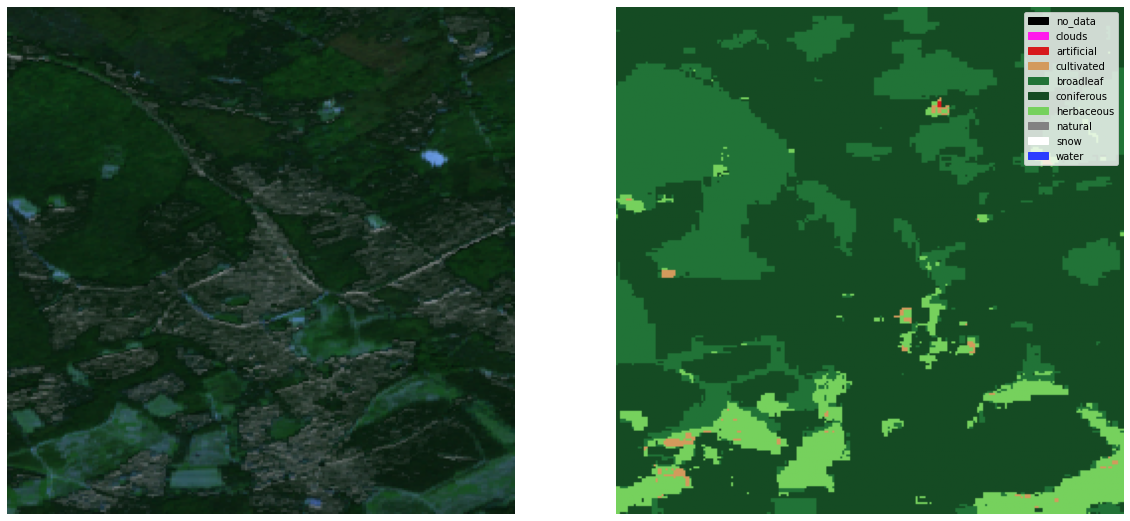

In [128]:
start = time.perf_counter()
a=0
rien_tot = np.empty((0,a))
count =0
display_max = 2200
display_min = 0
for k, idx in enumerate(random.sample(range(len(train_images_paths)), 1)):
    axisconca = 0
    image_path = train_images_paths[idx]
    mask_path = train_masks_paths[idx]
    assert image_path.name == mask_path.name
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 20))
    
    with TiffFile(image_path) as tif:
        image = tif.asarray()  
    if image.dtype == np.uint16:
        iscale = display_max - display_min
        scale = 255 / iscale
        byte_im = (image) * scale
        byte_im = (byte_im.clip(0, 255) + 0.5).astype(np.uint8)
    image = byte_im
    colimg = byte_im
    with TiffFile(mask_path) as tif :
        colmask = tif.asarray()
        colmask_test = colmask
    
    colimage = pixelimage(colimg2, colimg, colmask)
    
    couleur = np.concatenate((couleur, colimage), axis = 0)
    Resul = pixel(train, test_sum)
    axs[0].axis("off")
    im = axs[0].imshow(image)
    classes_colorpalette = {c: color/255. for (c, color) in LCD.CLASSES_COLORPALETTE.items()}
    show_mask = np.empty((*colmask.shape, 3))
    classes = LCD.CLASSES
    for c, color in classes_colorpalette.items():
        show_mask[colmask == c, :] = color
        
    axs[1].axis("off")
    im = axs[1].imshow(show_mask)
    handles = []
    for c, color in classes_colorpalette.items():
        handles.append(mpatches.Patch(color=color, label=classes[c]))
        axs[1].legend(handles=handles)

end = time.perf_counter()

print("temps en seconde : ", end - start)

In [130]:
no_data_test = np.count_nonzero(Resul == 0)
clouds_test = np.count_nonzero(Resul == 1)
artificial_test = np.count_nonzero(Resul ==2)
cultivated_test = np.count_nonzero(Resul == 3)
broadleaf_test = np.count_nonzero(Resul == 4)
coniferous_test = np.count_nonzero(Resul == 5)
herbaceous_test = np.count_nonzero(Resul == 6)
natural_test = np.count_nonzero(Resul == 7)
snow_test = np.count_nonzero(Resul == 8)
water_test = np.count_nonzero(Resul == 9)

print("no_data_test", no_data_test)
print("clouds_test     :", clouds_test)
print("artificial_test :",artificial_test)
print("cultivated_test :",cultivated_test)
print("broadleaf_test  :",broadleaf_test)
print("coniferous_test :",coniferous_test)
print("herbaceous_test :",herbaceous_test)
print("natural_test    :",natural_test)
print("snow_test       :",snow_test)
print("water_test      :",water_test)


no_data_test 0
clouds_test     : 0
artificial_test : 6326
cultivated_test : 9860
broadleaf_test  : 22265
coniferous_test : 10594
herbaceous_test : 13362
natural_test    : 2874
snow_test       : 0
water_test      : 255


In [ ]:
for i in range(water.shape[0]) : 
    print(water[i])
    


In [138]:
print(np.mean(water))
print(np.mean(water, axis =0))
print(np.sum(np.mean(water, axis =0)))

-2.57438345078733
[-0.20526565 -0.3761111  -0.28738992 -9.42876714]
-10.297533803149438


In [129]:
no_data_colmask = np.count_nonzero(colmask == 0)
clouds_colmask = np.count_nonzero(colmask == 1)
artificial_colmask = np.count_nonzero(colmask ==2)
cultivated_colmask = np.count_nonzero(colmask == 3)
broadleaf_colmask = np.count_nonzero(colmask == 4)
coniferous_colmask = np.count_nonzero(colmask == 5)
herbaceous_colmask = np.count_nonzero(colmask == 6)
natural_colmask = np.count_nonzero(colmask == 7)
snow_colmask = np.count_nonzero(colmask == 8)
water_colmask = np.count_nonzero(colmask == 9)

print("no_data_test", no_data_colmask)
print("clouds_test     :", clouds_colmask)
print("artificial_test :",artificial_colmask)
print("cultivated_test :",cultivated_colmask)
print("broadleaf_test  :",broadleaf_colmask)
print("coniferous_test :",coniferous_colmask)
print("herbaceous_test :",herbaceous_colmask)
print("natural_test    :",natural_colmask)
print("snow_test       :",snow_colmask)
print("water_test      :",water_colmask)

no_data_test 0
clouds_test     : 0
artificial_test : 6
cultivated_test : 312
broadleaf_test  : 15208
coniferous_test : 45334
herbaceous_test : 4676
natural_test    : 0
snow_test       : 0
water_test      : 0


# Test

In [110]:
def couleurtest(image):
    colimg= np.array(image)
    a=4
    RGB = np.empty((0,a))
    
    #pixel = colimg.shape[0]*colimg.shape[1]
    for i in range(colimg.shape[0]):
        for j in range(colimg.shape[1]):
            RGB = np.concatenate((RGB,[colimg[i][j]]), axis = 0)
            
    RGB_moy = np.nanmean(RGB,axis=0)
    E_RGB = np.nanstd(RGB, axis = 0)
    
    RGB_test = (RGB-RGB_moy)/E_RGB
    return RGB_test
def pixel(train, test):
    pixel = []
    for i in range(test.shape[0]):
        train_ = train
        b = (train_[:,1]-test[i])
        c= abs(b)
        pixel_= np.nanargmin(c)
        pixel = np.concatenate((pixel, [pixel_]))
    return pixel
    Resul = pixel(train, test_sum)

In [131]:
print(test_sum[358])
b = train
a = (b[:,1]-test_sum[358])
c = abs(a)
print(c)
print(np.nanargmin(c))

-1.219914780212426
[       nan        nan 3.46336611 3.54392054 0.5593655  1.58601579
 1.66760444 9.81455682        nan 9.07761902]
4


temps en seconde :  11.74710902001243


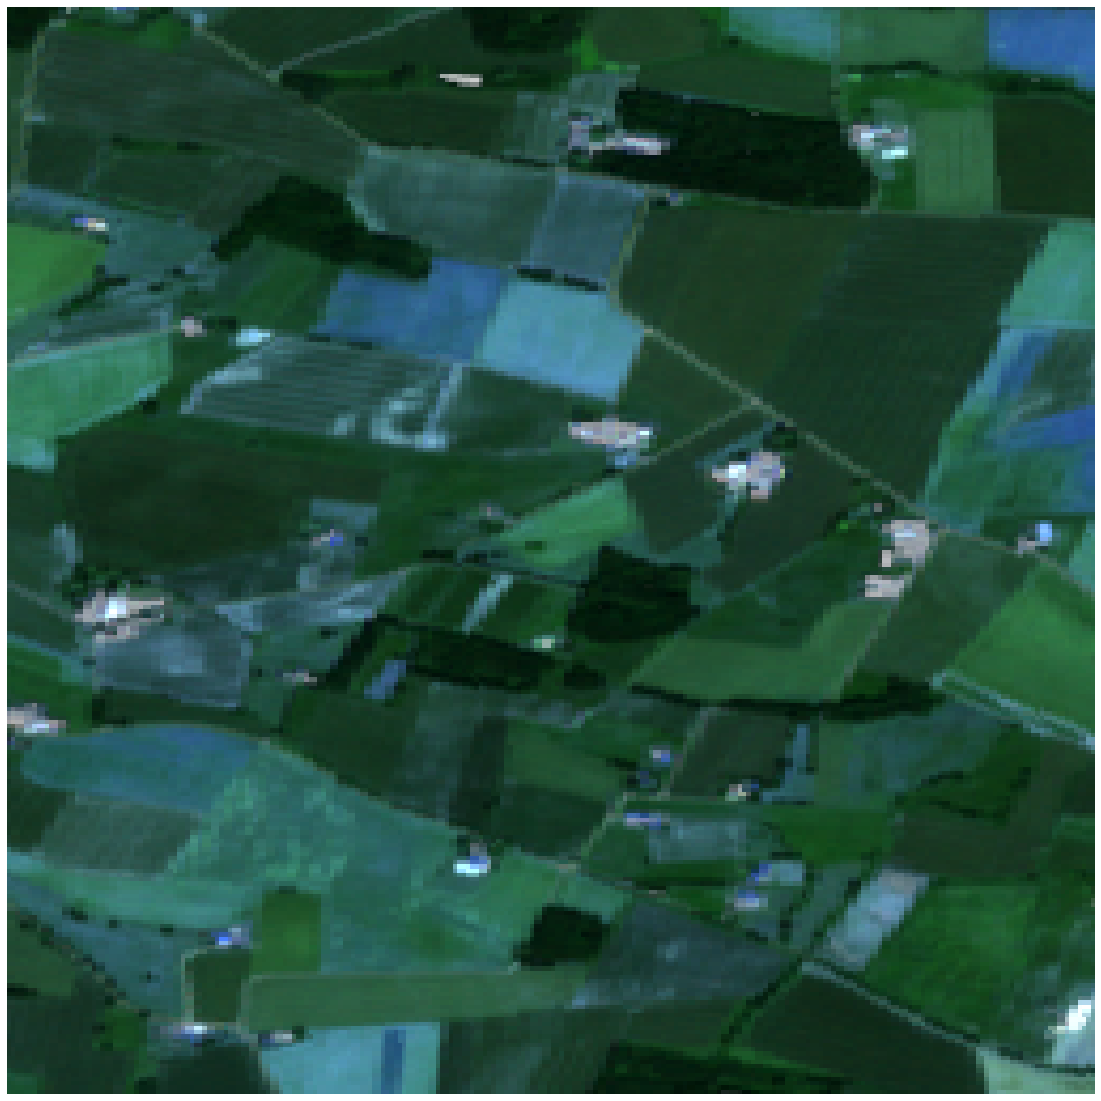

In [95]:
start = time.perf_counter()
a=0
rien_tot = np.empty((0,a))
count =0
display_max = 2200
display_min = 0
for k, idx in enumerate(random.sample(range(len(test_images_paths)), 1)):
    axisconca = 0
    image_path = test_images_paths[idx]
       
    fig, axs = plt.subplots(1, 1, figsize=(20, 20))
    
    with TiffFile(image_path) as tif:
        image = tif.asarray()  
    if image.dtype == np.uint16:
        iscale = display_max - display_min
        scale = 255 / iscale
        byte_im = (image) * scale
        byte_im = (byte_im.clip(0, 255) + 0.5).astype(np.uint8)
    image = byte_im
    test= couleurtest(image)
    test_sum = np.sum(test, axis=1)
    Resul = pixel(train, test_sum)
    axs.axis("off")
    im = axs.imshow(image)
    
end = time.perf_counter()

print("temps en seconde : ", end - start)

In [96]:
no_data_test = np.count_nonzero(Resul == 0)
clouds_test = np.count_nonzero(Resul == 1)
artificial_test = np.count_nonzero(Resul ==2)
cultivated_test = np.count_nonzero(Resul == 3)
broadleaf_test = np.count_nonzero(Resul == 4)
coniferous_test = np.count_nonzero(Resul == 5)
herbaceous_test = np.count_nonzero(Resul == 6)
natural_test = np.count_nonzero(Resul == 7)
snow_test = np.count_nonzero(Resul == 8)
water_test = np.count_nonzero(Resul == 9)

print("no_data_test", no_data_test)
print("clouds_test     :", clouds_test)
print("artificial_test :",artificial_test)
print("cultivated_test :",cultivated_test)
print("broadleaf_test  :",broadleaf_test)
print("coniferous_test :",coniferous_test)
print("herbaceous_test :",herbaceous_test)
print("natural_test    :",natural_test)
print("snow_test       :",snow_test)
print("water_test      :",water_test)

no_data_test 0
clouds_test     : 2576
artificial_test : 7754
cultivated_test : 8027
broadleaf_test  : 19279
coniferous_test : 9972
herbaceous_test : 16904
natural_test    : 769
snow_test       : 0
water_test      : 255


In [97]:
print(list(zip(*np.where(Resul ==1))))

[(14,), (23,), (24,), (270,), (442,), (443,), (556,), (557,), (693,), (694,), (696,), (697,), (698,), (699,), (812,), (813,), (949,), (950,), (952,), (953,), (1210,), (1211,), (1212,), (1720,), (1721,), (1722,), (1723,), (1724,), (1729,), (1980,), (1981,), (1982,), (1985,), (2537,), (2538,), (2812,), (2813,), (2815,), (3068,), (3069,), (3070,), (3071,), (3324,), (3325,), (3326,), (3327,), (3582,), (3583,), (3835,), (3836,), (3837,), (4091,), (6284,), (6540,), (7047,), (7048,), (7049,), (7050,), (7051,), (7374,), (7379,), (7625,), (7626,), (7633,), (7634,), (7815,), (7816,), (7823,), (7824,), (7891,), (8071,), (8072,), (8077,), (8078,), (8079,), (8080,), (8086,), (8144,), (8145,), (8146,), (8147,), (8327,), (8328,), (8332,), (8392,), (8396,), (8397,), (8401,), (8402,), (8403,), (8652,), (8653,), (8654,), (8655,), (8789,), (8790,), (8791,), (9164,), (9165,), (9171,), (10370,), (10371,), (10626,), (10627,), (11155,), (11419,), (12816,), (12817,), (12818,), (12821,), (12822,), (13079,), (1

In [85]:
test_sum[5]

2.6954610479086654

In [64]:
#no_data, clouds, artificial, cultivated, broadleaf, coniferous, herbaceous, natural, snow, water = intervalle(no_data_moy, clouds_moy,artificial_moy, cultivated_moy, broadleaf_moy, coniferous_moy,herbaceous_moy, natural_moy,snow_moy, water_moy,E_no_data, E_clouds, E_artificial, E_cultivated,  E_broadleaf, E_coniferous, E_herbaceous, E_natural, E_snow, E_water)
rien_tot = np.empty((0,a))
count =0
display_max = 2200
display_min = 0
for k, idx in enumerate(random.sample(range(len(test_images_paths)), 10)):
    axisconca = 0
    image_path = test_images_paths[idx]
       
    #fig, axs = plt.subplots(1, 3, figsize=(20, 20))
    
    with TiffFile(image_path) as tif:
        image = tif.asarray()  
    if image.dtype == np.uint16:
        iscale = display_max - display_min
        scale = 255 / iscale
        byte_im = (image) * scale
        byte_im = (byte_im.clip(0, 255) + 0.5).astype(np.uint8)
    colimage = byte_im
    #axs[0].axis("off")
    #im = axs[0].imshow(image)
        
    image= np.array(colimage)
    count+=1
    print(count)
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):            
            if ((no_data_inf[0]<image[i][j][0]<no_data_sup[0])and(no_data_inf[1]<image[i][j][1]<no_data_sup[1])and(no_data_inf[2]<image[i][j][2]<no_data_sup[2])and(no_data_inf[3]<image[i][j][3]<no_data_sup[3])) :
                test_no_data =test_no_data+1
            if ((clouds_inf[0]<image[i][j][0]<clouds_sup[0])and(clouds_inf[1]<image[i][j][1]<clouds_sup[1])and(clouds_inf[2]<image[i][j][2]<clouds_sup[2])and(clouds_inf[3]<image[i][j][3]<clouds_sup[3])) :
                test_clouds = test_clouds+1
                #colmask_test[i][j] == [255,25,236]
            if ((artificial_inf[0]<image[i][j][0]<artificial_sup[0])and(artificial_inf[1]<image[i][j][1]<artificial_sup[1])and(artificial_inf[2]<image[i][j][2]<artificial_sup[2])and(artificial_inf[3]<image[i][j][3]<artificial_sup[3])) :
                test_artificial =test_artificial +1
                #colmask_test[i][j] == [215,25,28]
            if ((cultivated_inf[0]<image[i][j][0]<cultivated_sup[0])and(cultivated_inf[1]<image[i][j][1]<cultivated_sup[1])and(cultivated_inf[2]<image[i][j][2]<cultivated_sup[2])and(cultivated_inf[3]<image[i][j][3]<cultivated_sup[3])) :
                test_cultivated  = test_cultivated +1
                #colmask_test[i][j] == [211,154,92]
            if ((broadleaf_inf[0]<image[i][j][0]<broadleaf_sup[0])and(broadleaf_inf[1]<image[i][j][1]<broadleaf_sup[1])and(broadleaf_inf[2]<image[i][j][2]<broadleaf_sup[2])and(broadleaf_inf[3]<image[i][j][3]<broadleaf_sup[3])) :    
                test_broadleaf  = test_broadleaf +1
                #colmask_test[i][j] == [33,115,55]
            if ((coniferous_inf[0]<image[i][j][0]<coniferous_sup[0])and(coniferous_inf[1]<image[i][j][1]<coniferous_sup[1])and(coniferous_inf[2]<image[i][j][2]<coniferous_sup[2])and(coniferous_inf[3]<image[i][j][3]<coniferous_sup[3])) :
                test_coniferous  = test_coniferous+1
                #colmask_test[i][j] == [21,75,35]
            if ((herbaceous_inf[0]<image[i][j][0]<herbaceous_sup[0])and(herbaceous_inf[1]<image[i][j][1]<herbaceous_sup[1])and(herbaceous_inf[2]<image[i][j][2]<herbaceous_sup[2])and(herbaceous_inf[3]<image[i][j][3]<herbaceous_sup[3])) :
                test_herbaceous  = test_herbaceous+1
                #colmask_test[i][j] == [118,209,93]
            if ((natural_inf[0]<image[i][j][0]<natural_sup[0])and(natural_inf[1]<image[i][j][1]<natural_sup[1])and(natural_inf[2]<image[i][j][2]<natural_sup[2])and(natural_inf[3]<image[i][j][3]<natural_sup[3])) :
                test_natural  = test_natural+1
                #colmask_test[i][j] == [130,130,130]
            if ((snow_inf[0]<image[i][j][0]<snow_sup[0])and(snow_inf[1]<image[i][j][1]<snow_sup[1])and(snow_inf[2]<image[i][j][2]<snow_sup[2])and(snow_inf[3]<image[i][j][3]<snow_sup[3])) :
                test_snow  = test_snow+1
                #colmask_test[i][j] == [255,255,255]
            if ((water_inf[0]<image[i][j][0]<water_sup[0])and(water_inf[1]<image[i][j][1]<water_sup[1])and(water_inf[2]<image[i][j][2]<water_sup[2])and(water_inf[3]<image[i][j][3]<water_sup[3])) :
                test_water  = test_water+1
                #colmask_test[i][j] == [43,61,255]
            #else : 
             #   rien_tot  = np.concatenate((rien_tot,[image[i][j]]), axis = axisconca)
              #  rien = rien+1

print("0 : " ,test_no_data)
print("1 : " ,test_clouds)
print("2 : " ,test_artificial)
print("3 : " ,test_cultivated)
print("4 : ", test_broadleaf)
print("5 : ", test_coniferous)
print("6 : ", test_herbaceous)
print("7 : ", test_natural)
print("8 : ", test_snow)
print("9 : ", test_water)

print(test_no_data+test_clouds+test_artificial+test_cultivated+test_broadleaf+test_coniferous+test_herbaceous+test_natural+test_snow+test_water)


1
2
3
4
5
6
7
8
9
10
0 :  0
1 :  0
2 :  227095
3 :  259803
4 :  84383
5 :  117050
6 :  199021
7 :  145438
8 :  0
9 :  1530
1034320


In [54]:
print(rien_tot)

[[ 61.  71.  30.  19.]
 [ 62.  69.  31.  18.]
 [ 62.  69.  31.  18.]
 ...
 [  3.  29.  13. 255.]
 [  5.  32.  14. 255.]
 [  4.  27.  11. 255.]]


In [56]:
print(coniferous_inf[0],"  ", coniferous_sup[0]), print(coniferous_inf[1],"  ", coniferous_sup[1])
print(coniferous_inf[2],"  ", coniferous_sup[2])
print(coniferous_inf[3],"  ", coniferous_sup[3])
print(image[55][:])

5.22702226245913    25.713175813643794
21.032827158742297    49.54121444671665
5.378276515829306    39.18581389785595
225.1544354592414    265.638295432101
[[ 40  87  79 255]
 [ 38  84  65 255]
 [ 38  84  65 255]
 ...
 [  8  36  15 255]
 [  8  36  15 255]
 [ 10  44  21 255]]


In [379]:
def show_image(image, display_min=50, display_max=400, ax=None):
    """Show an image.
    Args:
        image (numpy.array[uint16]): the image. If the image is 16-bit, apply bytescaling to convert to 8-bit
    """
    if image.dtype == np.uint16:
        iscale = display_max - display_min
        scale = 255 / iscale
        byte_im = (image) * scale
        byte_im = (byte_im.clip(0, 255) + 0.5).astype(np.uint8)
        image = byte_im
    # show image
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis("off")
    im = ax.imshow(image)
    
    return im

def show_mask(mask, classes_colorpalette, classes=None, add_legend=True, ax=None):
    """Show a a semantic segmentation mask.
    Args:
       mask (numpy.array[uint8]): the mask in 8-bit
       classes_colorpalette (dict[int, tuple]): dict mapping class index to an RGB color in [0, 1]
       classes (list[str], optional): list of class labels
       add_legend
    """
    show_mask = np.empty((*mask.shape, 3))
    for c, color in classes_colorpalette.items():
        show_mask[mask == c, :] = color
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis("off")
    im = ax.imshow(show_mask)
    if add_legend:
        # show legend mapping pixel colors to class names
        import matplotlib.patches as mpatches
        handles = []
        for c, color in classes_colorpalette.items():
            handles.append(mpatches.Patch(color=color, label=classes[c]))
        ax.legend(handles=handles)
    return im

# Test d'un réseau de neuronnes avec une seule couche. 

In [22]:
# Nous avons des images en 256*256 pixels, soit 65 536 pixels par images avec 10 classes différentes, soit 655 360 paramètres pour la première couche du réseau de neuronnes.
# Pour ce faire, nous allons créer 10 filtres unicolores pour chaque classes. A savoir, nos images comportent 4 couleurs : Rouge, vert, bleu mais aussi spectroscopie dans l'infrarouge proche SPIR.
# Dans ce premier cas, on ne prendra pas en compte le SPIR mais uniquement le spectre du visible. 
# P : matrice de pixels 246*256 soit 1*65 536
# W : matrices filtres de tailles 65 536 * 10
# S : matrices de 1*10 allant de 0 à 1 (pourcentage de classe) => sum(S) = 1
# 
# De ce fait, lors de la phase de test, l'inconnue dans notre opération est W, notre matric de filtre.
# Pour trouver la valeur de la matrixe W, on tentera de miimiser notre erreur E:
# E = sum((P.W-S)²)                   => pour les dimension des matrices :  sum (((1 * 65 536 . 65 536 * 10) - 1*10)²)
# Si E = 0, on aura trouver le filtre le plus proche possible pour passer de notre image satellite au mask que nous appliquons. 
# Pour nous approcher de E = 0, nous allons donc devoir faire varier notre filtre W. Pour ce faire, on utilisera le gradient de W. Soit 
# W(i+1 ) = W(i) - f'(W(i)) * fac     avec fac proche de 0 pour le faire varier petit à petit. 
# Le gradient de W est  : Grad = t(P)*(2*(P.W-S))    avec t(P) la transposé de la matrice P

In [ ]:
# les 10 classes en RGB et hexa
# No-data => 0;0;0      FFFFFF
# Clouds => 255;25;23   FF19EC
# Artificial surfaces and constructions => 215;25;28   D7191C
# Cultivated ares => 211;154;92   D39A5C
# broadleaf tree cover => 33;115;55   217337
# Coniferous tree vover => 21;75;35   154B23
# Herbaceous vegetation => 118;209;93   76D15D
# Natural material surfaces => 130;130;130   828282
# Permanent snow-covered surfaces => 255;255;255   FFFFFF
# Water bodies => 43;61;255   2B3DFF

In [32]:
https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/01_Simple_Linear_Model.ipynb

AttributeError: module 'matplotlib' has no attribute 'get_cmap'

In [ ]:
a = 4
    no_data = np.empty((0,a))
    clouds = np.empty((0,a))
    artificial = np.empty((0,a))
    cultivated = np.empty((0,a))
    broadleaf = np.empty((0,a))
    coniferous = np.empty((0,a))
    herbaceous = np.empty((0,a))
    natural = np.empty((0,a))
    snow = np.empty((0,a))
    water = np.empty((0,a))
    axisconca = 0
    
    
    
no_data_tot_moy = np.nanmean(no_data_moy_tot,axis=0)
clouds_tot_moy = np.nanmean(clouds_moy_tot, axis=0)
artificial_tot_moy = np.nanmean(artificial_moy_tot, axis=0)
cultivated_tot_moy = np.nanmean(cultivated_moy_tot, axis=0)
broadleaf_tot_moy = np.nanmean(broadleaf_moy_tot, axis=0)
coniferous_tot_moy = np.nanmean(coniferous_moy_tot, axis=0)
herbaceous_tot_moy = np.nanmean(herbaceous_moy_tot, axis=0)
natural_tot_moy = np.nanmean(natural_moy_tot, axis=0)
snow_tot_moy = np.nanmean(snow_moy_tot, axis=0)
water_tot_moy = np.nanmean(water_moy_tot, axis=0)